In [1]:
import cv2
import pytesseract
import numpy as np
from PIL import ImageGrab
import time
import re
import matplotlib.pyplot as plt
import statistics
from statistics import mode 

pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

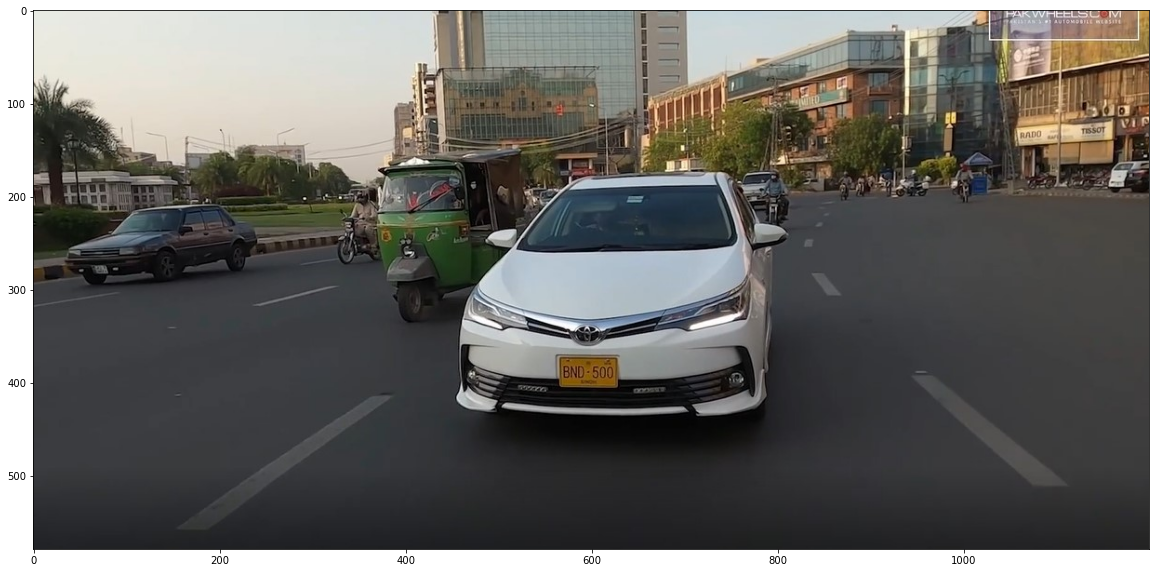

In [2]:
image = cv2.imread('car9.jpg')
plt.figure(figsize=[20,20])
plt.imshow(image[:,:,::-1])

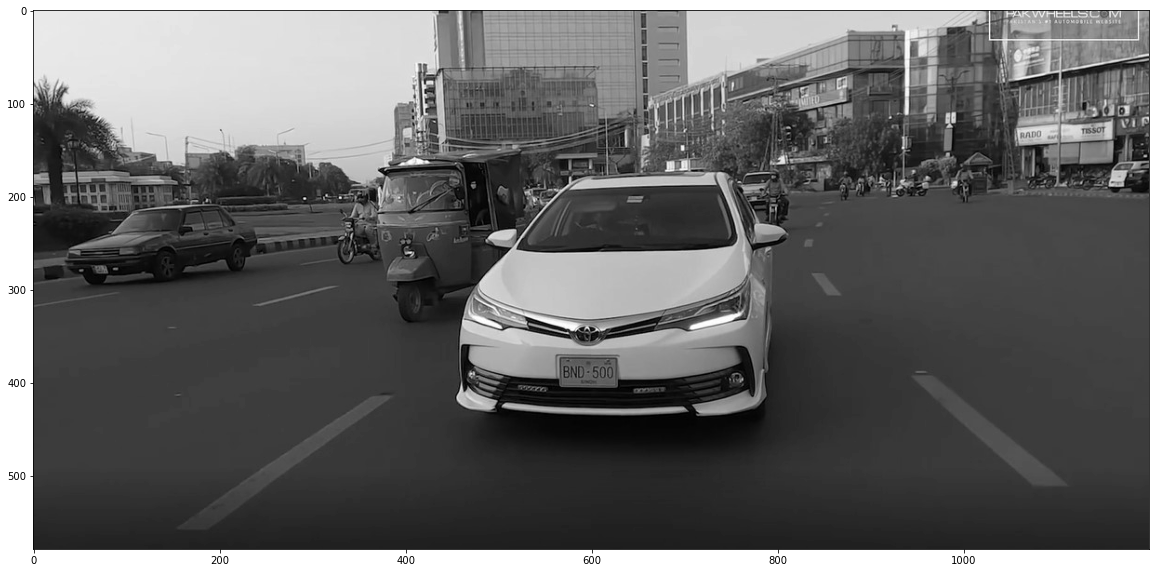

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=[20,20])
plt.imshow(gray,cmap='gray')

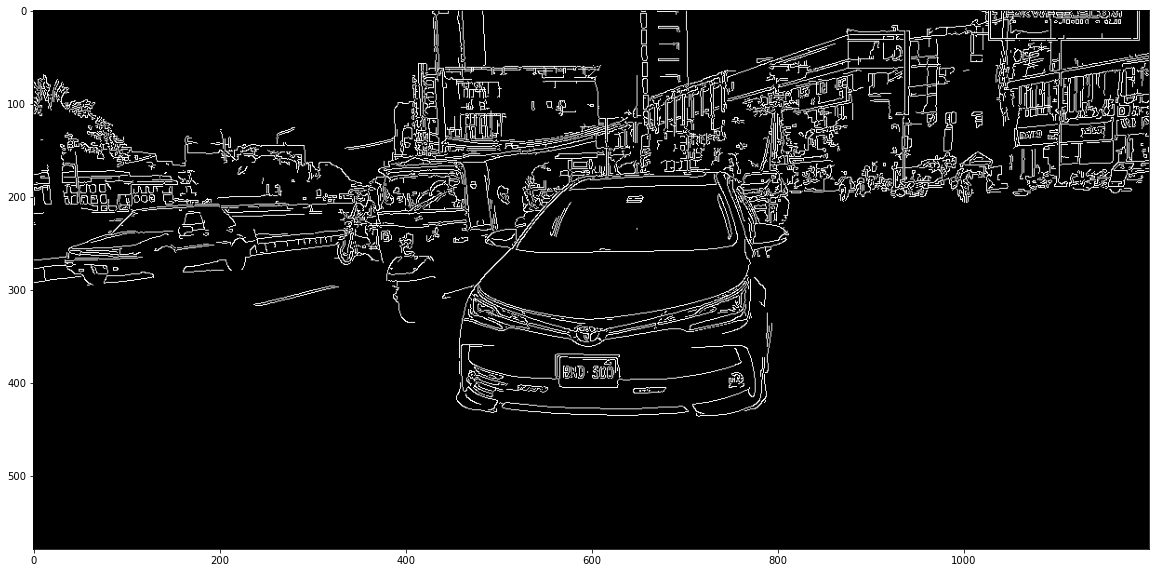

In [5]:
#bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(gray,100, 300) #Edge detection
plt.figure(figsize=[20,20])
#bfilter = cv2.bilateralFilter(edged, 11, 17, 17) #Noise reduction
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

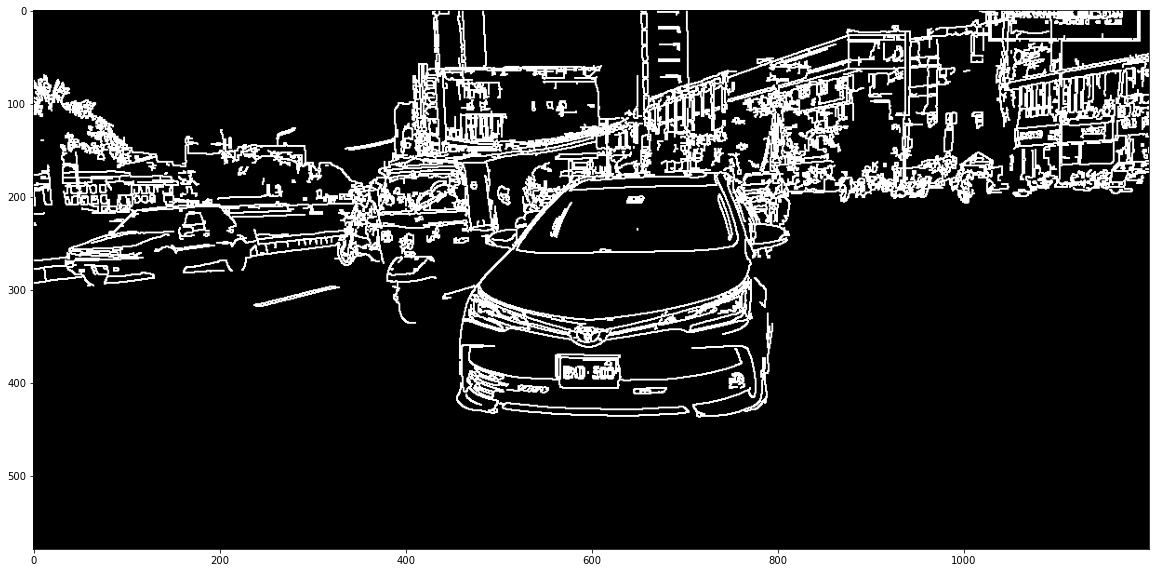

In [6]:
rect_kern = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
# apply dilation to make regions more clear
dilation = cv2.dilate(edged, rect_kern, iterations = 1)
plt.figure(figsize=[20,20])
plt.imshow(dilation,cmap='gray')

In [7]:
contours, new  = cv2.findContours(dilation, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours=sorted(contours, key = cv2.contourArea, reverse = True)[:10]

1454.5
6


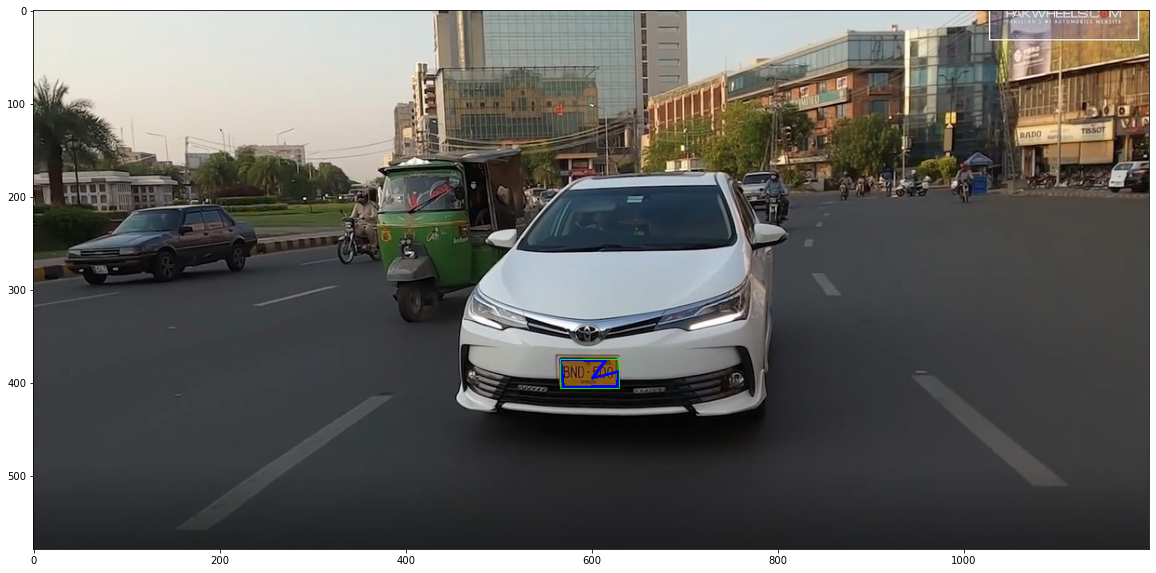

In [9]:
image2 = image.copy()
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05* perimeter, True)
    #cv2.drawContours(image2,contour,-1,(0,0,255),3)
    #print(cv2.contourArea(contour))
    #print(len(approx))
    
    #print(len(approx))
    #print(cv2.contourArea(approx))
    if len(approx)>=4 and cv2.contourArea(approx) > 100 and cv2.contourArea(approx) < 1500: #and cv2.contourArea(approx) < 25000:
        cv2.drawContours(image2,[approx],0,(255,0,0),2)
        x, y, w, h = cv2.boundingRect(approx)
        #print(cv2.contourArea(contour))
        #print(len(approx))
        cv2.rectangle(image2, (x , y ), (x + w , y + h ), (0, 255, 0), 1)
        print(cv2.contourArea(contour))
        print(len(approx))
        #plt.imshow(license_plate_threshed,cmap='gray')
plt.figure(figsize=[20,20])
plt.imshow(image2[:,:,::-1])

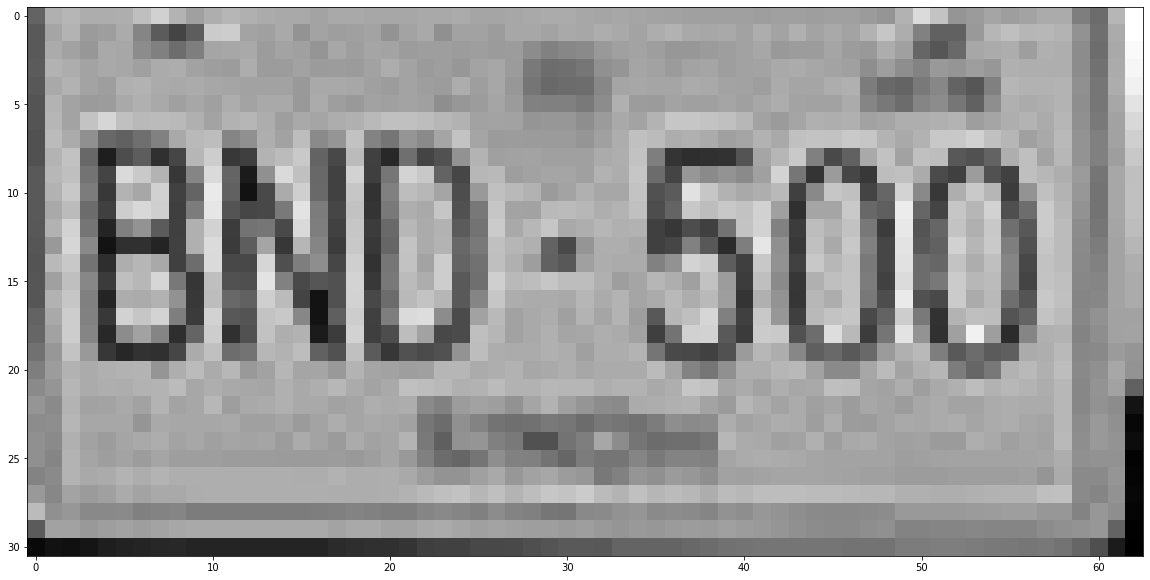

In [10]:
license_plate = gray[y:y + h, x:x + w]
plt.figure(figsize=[20,20])
plt.imshow(license_plate,cmap='gray')

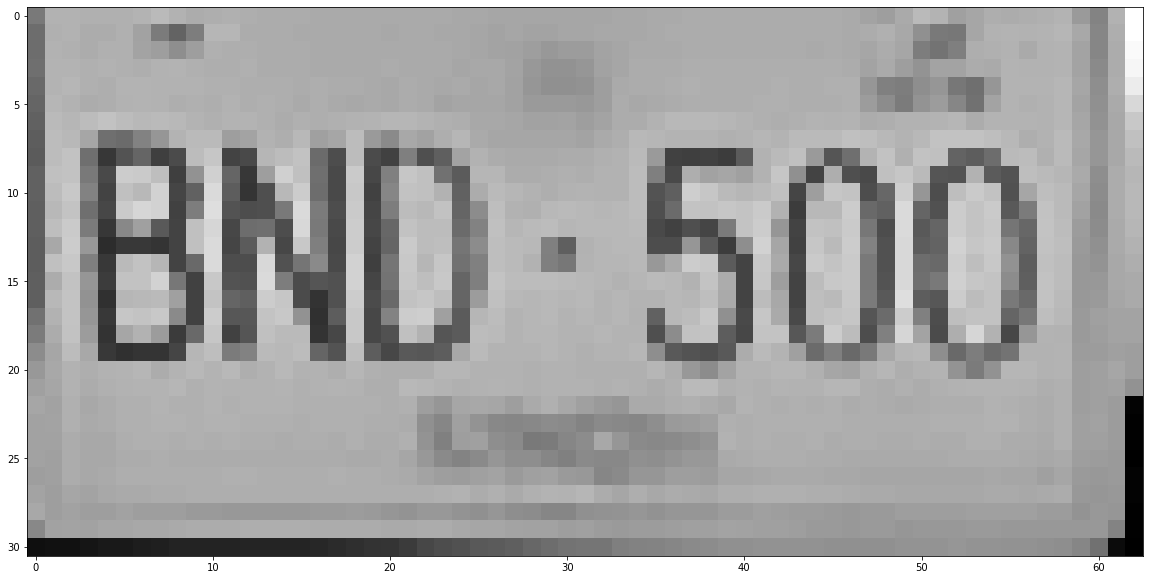

In [12]:
b_filter = cv2.bilateralFilter(license_plate, 11, 17, 17)
plt.figure(figsize=[20,20])
plt.imshow(b_filter,cmap='gray')

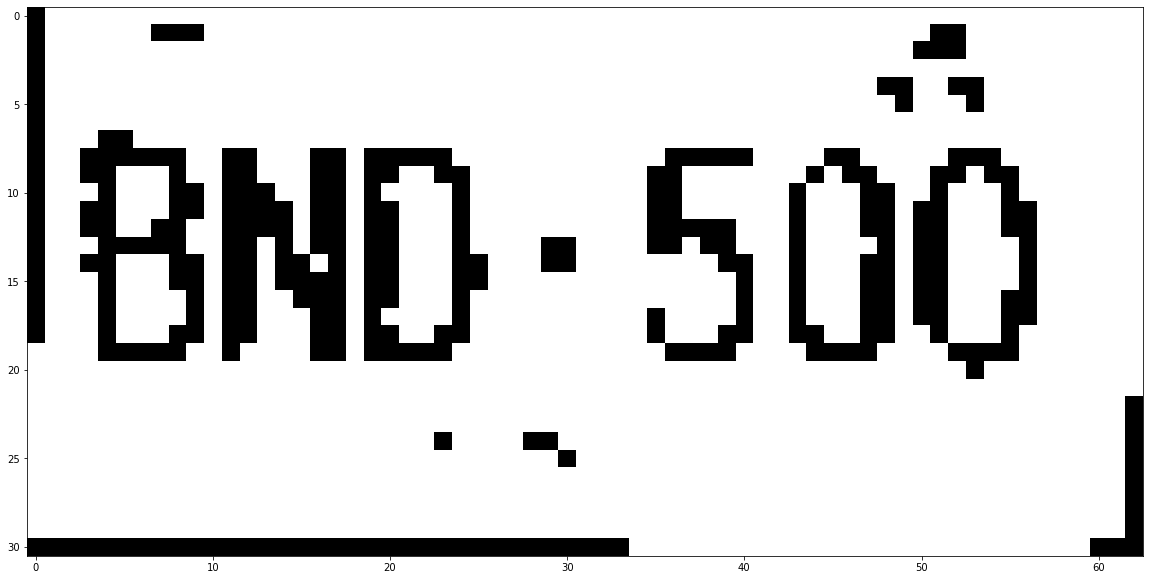

In [13]:
ret, thresh = cv2.threshold(b_filter, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY)
plt.figure(figsize=[20,20])
plt.imshow(thresh,cmap='gray')

In [14]:
text = pytesseract.image_to_string(thresh, config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 6')
text

'BND- 500\n\x0c'